In [22]:
!pip install opencv-python


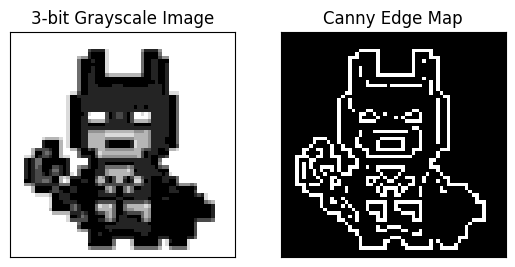

In [25]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

def load_image(filepath, size=(32, 32)):
    img = Image.open(filepath).convert('L')  # Grayscale
    img = img.resize(size, Image.Resampling.LANCZOS)
    return np.array(img)

def normalize_image(image, bits=3):
    max_val = 2**bits - 1
    return np.round((image / 255) * max_val).astype(int)

# Load and normalize to 3-bit
image = load_image('images/batman16.jpg', size=(64, 64))
img_3bit = normalize_image(image, bits=3)  # shape (32,32), values 0–7

# ✅ Rescale to 8-bit for Canny
img_for_canny = (img_3bit * (255 // 7)).astype(np.uint8)

# Apply Canny edge detection
edges = cv.Canny(img_for_canny, 100, 200)

# Display
plt.subplot(121), plt.imshow(img_3bit, cmap='gray', vmin=0, vmax=7)
plt.title('3-bit Grayscale Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Map'), plt.xticks([]), plt.yticks([])
plt.show()
